In [1]:
#Import everything#
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
#Bring in the Datasets #
genuine_tweets = pd.read_csv("C:/Twitter/genuine_accounts/tweets.csv")
genuine_users = pd.read_csv("C:/Twitter/genuine_accounts/users.csv")

C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sbot_tweets_1 = pd.read_csv("C:/Twitter/social_spambots_1/tweets.csv")
sbot_users_1 = pd.read_csv("C:/Twitter/social_spambots_1/users.csv")
sbot_tweets_2 = pd.read_csv("C:/Twitter/social_spambots_2/tweets.csv")
sbot_users_2 = pd.read_csv("C:/Twitter/social_spambots_2/users.csv")
sbot_tweets_3 = pd.read_csv("C:/Twitter/social_spambots_3/tweets.csv")
sbot_users_3 = pd.read_csv("C:/Twitter/social_spambots_3/users.csv")
ffollow_users = pd.read_csv("C:/Twitter/fake_followers/users.csv")
ffollow_tweets = pd.read_csv("C:/Twitter/fake_followers/tweets.csv")

C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\cct51\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
list(genuine_tweets)

['id',
 'text',
 'source',
 'user_id',
 'truncated',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'in_reply_to_screen_name',
 'retweeted_status_id',
 'geo',
 'place',
 'contributors',
 'retweet_count',
 'reply_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'num_hashtags',
 'num_urls',
 'num_mentions',
 'created_at',
 'timestamp',
 'crawled_at',
 'updated']

In [5]:
tbot_tweets = pd.read_csv("C:/Twitter/traditional_spambots_1/tweets.csv")
tbot_users_1 = pd.read_csv("C:/Twitter/traditional_spambots_1/users.csv")
tbot_users_2 = pd.read_csv("C:/Twitter/traditional_spambots_2/users.csv")
tbot_users_3 = pd.read_csv("C:/Twitter/traditional_spambots_3/users.csv")
tbot_users_4 = pd.read_csv("C:/Twitter/traditional_spambots_4/users.csv")

In [6]:
#Re-attach the separated dataframes

sbot_tweets = pd.concat([sbot_tweets_1, sbot_tweets_2, sbot_tweets_3])
sbot_users = pd.concat([sbot_users_1, sbot_users_2, sbot_users_3])
tbot_users = pd.concat([tbot_users_1, tbot_users_2, tbot_users_3, tbot_users_4])

C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  after removing the cwd from sys.path.


In [7]:
#Now create a label for where tweets and users came from and attach all datasets together 

sbot_tweets['origin'] = 'socialbot'
genuine_tweets['origin'] = 'real'
ffollow_tweets['origin'] = 'followbot'
tbot_tweets['origin'] = 'tbot'

sbot_users['origin'] = 'socialbot'
genuine_users['origin'] = 'real'
ffollow_users['origin'] = 'followbot'
tbot_users['origin'] = 'tbot'

In [8]:
##in order to run well on the laptop, time to trim down the dataset into purely english users. 

ffollow_users_eng = ffollow_users[ffollow_users['lang'] == 'en']
genuine_users_eng = genuine_users[genuine_users['lang'] == 'en']
sbot_users_eng = sbot_users[sbot_users['lang'] == 'en']
tbot_users_eng = tbot_users[tbot_users['lang'] == 'en']


In [9]:
### Done -> Merge users to tweets on left join, with users being the left and tweets being the right, these 3 datasets. 
#(Basically the tweets need to just be english ))
### Next step: combined sets still need a filter to keep only ASCII characters - with the risk of deleting important emoji data
## memory error -> Idea: Split up genuine dataset into a couple, or filter out just 50k
### Then take 33,333 datapoints from each of them if possible to create 100k size dataset.
### Then combine datasets

In [10]:
#Sorting in order to check user_id values
genuine_tweets.sort_values(by=['user_id'])

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,origin
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.939322e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19,real
2125,547384258701312001,RT @chrisgeidner: Thirty-Five Injured In Attac...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.471446e+17,NaN,...,NaN,NaN,0.0,1.0,2.0,Tue Dec 23 13:32:31 +0000 2014,2014-12-23 14:32:31,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2126,547382436011995136,RT @tanehisicoates: This @HeerJeet ethering is...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.472183e+17,NaN,...,NaN,NaN,0.0,1.0,2.0,Tue Dec 23 13:25:17 +0000 2014,2014-12-23 14:25:17,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2127,547379659630190593,RT @tanehisicoates: People arguing we should c...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.471561e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 13:14:15 +0000 2014,2014-12-23 14:14:15,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2128,547377097954832384,@jelani9 Oy. I can't believe you had to spell ...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,5.471531e+17,1.415591e+07,jelani9,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,3.0,Tue Dec 23 13:04:04 +0000 2014,2014-12-23 14:04:04,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2129,547374989729873920,RT @tanehisicoates: People think Goldwater con...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,5.472230e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 12:55:41 +0000 2014,2014-12-23 13:55:41,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2130,547276916831449088,Awaiting the moment mums of North America begi...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,...,NaN,NaN,1.0,0.0,0.0,Tue Dec 23 06:25:59 +0000 2014,2014-12-23 07:25:59,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2131,547267956552388608,The important thing is that you must have deep...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,...,NaN,NaN,1.0,0.0,0.0,Tue Dec 23 05:50:23 +0000 2014,2014-12-23 06:50:23,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2132,547239980976705536,@esmecomfort that would be truly hard for me t...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,5.472327e+17,1.202174e+08,esmecomfort,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,1.0,Tue Dec 23 03:59:13 +0000 2014,2014-12-23 04:59:13,2015-05-01 12:57:22,2015-05-01 12:57:22,real
2133,547239573420388353,@sandyanne57 thanks! Happy Christmas! @marikot...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",6.780330e+05,NaN,5.472312e+17,8.259076e+08,sandyanne57,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,2.0,Tue Dec 23 03:57:36 +0000 2014,2014-12-23 04:57:36,2015-05-01 12:57:22,2015-05-01 12:57:22,real


In [11]:
genuine_tweets.head()

,id,text,source,user_id,truncated,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,retweeted_status_id,geo,...,retweeted,possibly_sensitive,num_hashtags,num_urls,num_mentions,created_at,timestamp,crawled_at,updated,origin
0,593932392663912449,RT @morningJewshow: Speaking about Jews and co...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,5.939322e+17,NaN,...,NaN,NaN,0.0,0.0,1.0,Fri May 01 00:18:11 +0000 2015,2015-05-01 02:18:11,2015-05-01 12:57:19,2015-05-01 12:57:19,real
1,593895316719423488,This age/face recognition thing..no reason pla...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 21:50:52 +0000 2015,2015-04-30 23:50:52,2015-05-01 12:57:19,2015-05-01 12:57:19,real
2,593880638069018624,Only upside of the moment I can think of is th...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,2.0,0.0,0.0,Thu Apr 30 20:52:32 +0000 2015,2015-04-30 22:52:32,2015-05-01 12:57:19,2015-05-01 12:57:19,real
3,593847955536252928,If you're going to think about+create experien...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,2.0,0.0,0.0,Thu Apr 30 18:42:40 +0000 2015,2015-04-30 20:42:40,2015-05-01 12:57:19,2015-05-01 12:57:19,real
4,593847687847350272,Watching a thread on FB about possible future ...,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",678033.0,NaN,0.0,0.0,NaN,0.000000e+00,NaN,...,NaN,NaN,0.0,0.0,0.0,Thu Apr 30 18:41:36 +0000 2015,2015-04-30 20:41:36,2015-05-01 12:57:19,2015-05-01 12:57:19,real


In [12]:
#Abbreviate columns to just relevant ones 
sbot_abbr = sbot_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
genuine_abbr = genuine_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
ffollow_abbr = ffollow_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]
tbot_abbr = tbot_tweets[['id', 'user_id', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'timestamp', 'origin']]

In [13]:
#Eliminate any rows with empty values 
sbot_abbr_clean = sbot_abbr.dropna()
genuine_abbr_clean = genuine_abbr.dropna()
ffollow_abbr_clean = ffollow_abbr.dropna()
tbot_abbr_clean = tbot_abbr.dropna()

In [14]:
#Turn all id's into integers.
genuine_abbr_clean['user_id'] = genuine_abbr_clean['user_id'].astype('int64')
sbot_abbr_clean['user_id'] = sbot_abbr_clean['user_id'].astype('int64')
ffollow_abbr_clean['user_id'] = ffollow_abbr_clean['user_id'].astype('int64')
tbot_abbr_clean['user_id'] = tbot_abbr_clean['user_id'].astype('int64')

C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cct51\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [15]:
genuine_id_list = list(genuine_users_eng['id'][:500])
sbot_id_list = list(sbot_users_eng['id'][:500])

In [16]:
idx = 0 

genuine_tweets_set = []

while idx < 280000:
    if genuine_abbr_clean.iloc[idx, 1] in genuine_id_list :
        genuine_tweets_set.append(genuine_tweets.iloc[idx, :])
    idx += 1 
    
genuine_tweets_df = pd.DataFrame(genuine_tweets_set)

In [17]:
#Do the same but for sbot

In [18]:
#Length of 46,191 sbot tweets

idx = 0 

sbot_tweets_set = []

while idx < 280000:
    if sbot_abbr_clean.iloc[idx, 1] in sbot_id_list :
        sbot_tweets_set.append(sbot_tweets.iloc[idx, :])
    idx += 1 
    
sbot_tweets_df = pd.DataFrame(sbot_tweets_set)

In [20]:
#Language data is not provided for the traditional bot users, so we will not include these in our sample. 

#tbot_users_eng.sort_values(by=['id'])
#test = pd.merge(tbot_users, tbot_tweets, how='inner', left_on='id', right_on='user_id')
#tbot_tweets

In [21]:
# Merge, then trim down the datasets here
genuine_combined_eng = pd.merge(genuine_users_eng, genuine_tweets_df, how='inner', left_on = 'id', right_on = 'user_id')
sbot_combined_eng = pd.merge(sbot_users_eng, sbot_tweets_df, how='inner', left_on = 'id', right_on = 'user_id')

In [22]:
#Complete prepping the rest of the data

genuine_combined_eng = genuine_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]
genuine_combined = genuine_combined_eng.dropna()
sbot_combined_eng = sbot_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]
sbot_combined = sbot_combined_eng.dropna()

ffollow_combined_eng = pd.merge(ffollow_users_eng, ffollow_tweets, how='inner', left_on = 'id', right_on='user_id')
ffollow_combined= ffollow_combined_eng[['id_x', 'name', 'screen_name', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'created_at_y', 'text', 'num_hashtags', 'num_urls', 'num_mentions', 'origin_x']]


In [23]:
#Trim the size of these dang datatsets 
#Also assemble our test, validation, and test sets
ffollow_combined_eng_cut = ffollow_combined[:24000]
validation_cut_1 = ffollow_combined[24000:32000]
test_cut_1 = ffollow_combined[32000:40000]
genuine_combined_eng_cut = genuine_combined[:24000]
validation_cut_2 = genuine_combined[24000:32000]
test_cut_2 = genuine_combined[32000:40000]
sbot_combined_eng_cut = sbot_combined[:24000]
validation_cut_3 = sbot_combined[24000:32000]
test_cut_3 = sbot_combined[32000:40000]

In [24]:
#Combine the datasets together 
all_tweets = pd.concat([sbot_combined_eng_cut, ffollow_combined_eng_cut, genuine_combined_eng_cut])
validation_cut = pd.concat([validation_cut_1, validation_cut_2, validation_cut_3])
test_cut = pd.concat([test_cut_1, test_cut_2, test_cut_3])

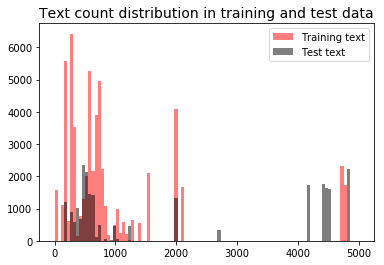

'\nTest\n'

In [34]:
train = all_tweets['friends_count']
test = test_cut['friends_count']
bins = np.linspace(0, 5000, 100)

plt.hist(x, bins, alpha=0.5, label='Training text', color='red')
plt.hist(y, bins, alpha=0.5, label='Test text', color='black')
plt.xlabel('')
plt.legend(loc='upper right')
plt.title('Text count distribution in training and test data', fontsize=14)
plt.show()

"""
The feature distribution of the training sample and the test sample, at least in terms of friends, seems similar enough between the
two conditions. This suggests a good level of external validity in test results. 
"""

In [25]:
#Bring in Natural Language Processing Tools
import nltk 

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0)
#Look at nltk resources then begin! 

In [28]:
all_tweets = all_tweets.dropna()

In [29]:
vectorizer.fit(all_tweets['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
x = vectorizer.transform(all_tweets['text'])

In [ ]:
#Where I'm at now-> I've trained 'x', which I think is a vocabulary assembled out of all these tweets... 
#though it's very hard to look at and a sample just displays lots of goobled up numbers.
#SO now the question is how to go from this goobled up number set to actual predictions. 

# I think I'm supposed to begin categorizing/scoring the data somehow, but I don't know how exactly.

In [ ]:
sbot_tweets.info()

In [ ]:
#-----------------------------------------tf-idf--------------------------------

In [54]:
#Trim to necessity later. define functions solely for their use. 



def top_tfidf_featstop_tfid (row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=10):
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=10):
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=10):
    dfs = []
    #labels = np.unique(y)
    labels = [2,7]
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(8, 30), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        #z = int(str(int(i/3)+1) + str((i%3)+1))
        ax = fig.add_subplot(9, 1, i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=16)
        ax.set_ylabel("Word", labelpad=16, fontsize=16)
        ax.set_title("Class = " + str(df.label), fontsize=18)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [26]:
all_tweets

,id_x,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at_y,text,num_hashtags,num_urls,num_mentions,origin_x
0,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Wed Nov 12 15:08:17 +0000 2014,Hoy es un buen día para empezar.,0.0,0.0,0.0,socialbot
1,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Mon Nov 10 19:53:58 +0000 2014,@CucharadeMadera estan abiertos hoy? donde y h...,0.0,0.0,1.0,socialbot
2,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Mon Nov 10 19:38:13 +0000 2014,No puedo creer q hace 6 años te me fuiste! Mis...,0.0,0.0,0.0,socialbot
3,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Mon Nov 10 14:56:42 +0000 2014,This is my Holiday/Monday/10Am/i work In a cal...,1.0,0.0,0.0,socialbot
4,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Mon Nov 10 02:47:33 +0000 2014,"asi es la vida.. tu decides que ver de ella, l...",0.0,0.0,0.0,socialbot
5,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Sun Nov 09 13:29:00 +0000 2014,Ni quieres querer.. ni quieres que te quieran..,0.0,0.0,0.0,socialbot
6,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Sun Nov 09 03:28:48 +0000 2014,recooooojaaan q ganan las Aguilas!!! #LaleñaTa...,3.0,0.0,0.0,socialbot
7,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Sun Nov 09 03:27:52 +0000 2014,RT @aguiluchos: #AguiPBP fue un placer haber l...,2.0,0.0,2.0,socialbot
8,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Sun Nov 09 03:24:22 +0000 2014,si te vas a ir.. vete!,0.0,0.0,0.0,socialbot
9,57007623,Rafiela Morales L.,RafielaMorales,7975,398,350,11,2,Sun Nov 09 01:14:53 +0000 2014,Late night capuccino anyone?,0.0,0.0,0.0,socialbot


In [55]:
##Next Step: Modify this into what it needs to be 
from sklearn.feature_extraction.text import TfidfVectorizer
def top_tfidf_feats(row, features, top_n=10):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

tfidf = TfidfVectorizer(min_df=5, stop_words = 'english', max_df=0.75).fit(all_tweets["text"])

Xtrain = tfidf.fit_transform(all_tweets["text"])
y = all_tweets["origin_x"]
features = tfidf.get_feature_names()
top_dfs = top_feats_by_class(Xtrain, y, features)

C:\Users\cct51\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\cct51\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


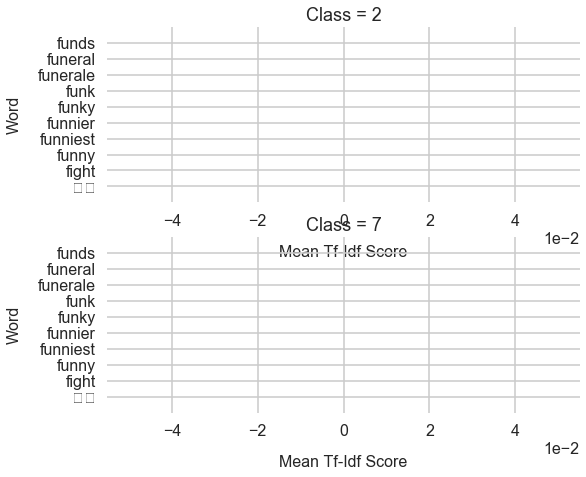

In [56]:
#PROBLEM: What is going on with this plot?
plot_tfidf_classfeats_h(top_dfs)

In [ ]:
#-----------------------------Word and model processing----------------------------------------

In [45]:
test_cut.head(1000)

,id_x,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at_y,text,num_hashtags,num_urls,num_mentions,origin_x
32000,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Mon Jun 28 20:19:14 +0000 2010,Ihhhuuuuu Braassiiillll,0.0,0.0,0.0,followbot
32001,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Mon Jun 28 19:52:19 +0000 2010,Uhhuuu Brasiilll,0.0,0.0,0.0,followbot
32002,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Fri Jun 18 19:30:44 +0000 2010,@QuartetoS2 queroo ver maiss fttss thau,0.0,0.0,1.0,followbot
32003,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Fri Jun 18 14:00:43 +0000 2010,To ansiosa para o casamentooo...!!(nurzz ate p...,0.0,0.0,0.0,followbot
32004,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Thu Jun 17 18:07:22 +0000 2010,Maiss tardee voltooo,0.0,0.0,0.0,followbot
32005,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Thu Jun 17 17:30:56 +0000 2010,'Affzz nada pra fazer,0.0,0.0,0.0,followbot
32006,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Thu Jun 17 17:02:27 +0000 2010,@eberthtg2 Nossa to quase querendo tirar elaa ...,0.0,0.0,0.0,followbot
32007,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Thu Jun 17 16:51:39 +0000 2010,@Thauane_ ta Bom..'Bjim,0.0,0.0,1.0,followbot
32008,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Thu Jun 17 16:47:17 +0000 2010,@Thauane_ esquenta num que te Gritooo msm viuu...,0.0,0.0,1.0,followbot
32009,113971880,Katyane Nascimento,katyane_,390,57,285,3,4,Thu Jun 17 16:42:25 +0000 2010,@Thauane_ Da nada naumm Eu desculpo Siim.... ...,0.0,0.0,1.0,followbot


In [49]:
#Make this generic function work for my case


def make_xy(tweets, vectorizer=None):
        
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(tweets.text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (tweets['origin_x'] == 'real').values.astype(np.int)
    return X, y

#X, y = make_xy(all_tweets)


Text(0,0.5,'Percent of df')

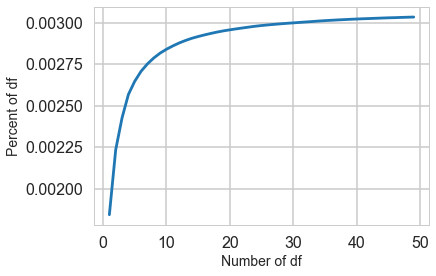

In [50]:
#In order to tune hyperparameters of our count vectorizer, let's look
#for an elbow value that captures a sizeable portion of our dataframe
#without overfitting.

#set up grid
sns.set_style("whitegrid")
sns.set_context("poster")

# plot to find minimum df
vectorizer = CountVectorizer(min_df=1)
X,y = make_xy(all_tweets,vectorizer=vectorizer)
dfs = []
for i in range(1,50):
    vectorizer = CountVectorizer(max_df=i)
    X,y = make_xy(all_tweets,vectorizer=vectorizer)
    dfs.append(X.shape[1])
dfs_percent = [df/31690362 for df in dfs]
plt.plot(range(1,50),dfs_percent)
plt.xlabel('Number of df', fontsize=14)
plt.ylabel('Percent of df', fontsize=14)

#The graph shows an elbow in the graph around a min_df of about
#6 or 7. This will define the CountVectorizer as we move forward


In [52]:
#Simplifying columns, reducing origin to a single word.
all_tweets2 = all_tweets.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})
validation_cut2 = validation_cut.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})
test_cut2 = test_cut.rename(index=str, columns={"id_x": "id", "name": "name", "screen_name": "screen_name", "statuses_count":"statuses_count", "followers_count":"followers_count", "friends_count":"friends_count", "favourites_count":"favorites_count", "listed_count": "listed_count", "created_at_y":"created_at", "text": "text", "num_hashtags":"num_hashtags", "num_urls":"num_urls", "num_mentions":"num_mentions", "origin_x":"origin"})

In [61]:
from sklearn.model_selection import train_test_split

y = all_tweets2['origin']
X_train, X_test, y_train, y_test = train_test_split(all_tweets2['text'], y, test_size=0.33, random_state=53)

In [59]:
def word_vect(vectorizer):
    train = vectorizer.fit_transform(X_train.values)
    test = vectorizer.transform(X_test.values)
    return vectorizer,train,test

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer,count_train,count_test = word_vect(vectorizer = CountVectorizer(min_df=6, stop_words='english'))
print('features length of counter vectorizer: ', len(count_vectorizer.get_feature_names()))

,id,name,screen_name,statuses_count,followers_count,friends_count,favorites_count,listed_count,created_at,text,num_hashtags,num_urls,num_mentions,origin
39001,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Mon Sep 29 11:19:08 +0000 2014,Gente che pur di sentirsi amata si accontenta....,0.0,0.0,0.0,socialbot
39002,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Mon Sep 29 06:30:00 +0000 2014,I grandi #dubbi. Ma se i libri si spulciano- p...,1.0,0.0,0.0,socialbot
39003,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sun Sep 28 16:32:52 +0000 2014,L'uomo se sente profumo di sesso si avvicina s...,0.0,0.0,0.0,socialbot
39004,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sun Sep 28 10:04:13 +0000 2014,Passiamo giornate a sindacare su morti di figa...,0.0,0.0,0.0,socialbot
39005,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sun Sep 28 09:44:49 +0000 2014,Mi sono iscritta su Twitter senza sapere il pe...,0.0,0.0,0.0,socialbot
39006,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sun Sep 28 05:19:14 +0000 2014,"Gli apostoli diventano rari, tutti sono padret...",0.0,0.0,0.0,socialbot
39007,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sat Sep 27 20:40:00 +0000 2014,Mi sto divertendo come una mosca in una paese ...,0.0,0.0,0.0,socialbot
39008,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sat Sep 27 12:06:09 +0000 2014,"Quando non ti entra la retro, ma nel retro ti ...",0.0,0.0,0.0,socialbot
39009,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sat Sep 27 11:22:42 +0000 2014,ai raccontami dell'incidente....... non vorrai...,0.0,0.0,0.0,socialbot
39010,434775697,Adolfo Pecoro,HadenDamonuyo,467,4116,4527,0,6,Sat Sep 27 08:59:13 +0000 2014,"EVITATE IL SOLE NELLE ORE CENTRALI, È PERICOLO...",0.0,0.0,0.0,socialbot


In [ ]:
#Big picture problem: Looks like the validation_cut and test_cut
#don't have many, if any English tweets at all. Might need to take
#a smaller sample size out of the data and take 3 cuts from that.